In [1]:
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.preprocessing import FunctionTransformer


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the train data
train_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')


In [3]:
# Keeping only the 'reviewText' and 'sentiment' columns for the analysis
train_data = train_data[['reviewText', 'sentiment']]

train_data.head()

,reviewText,sentiment
0,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,Creed II does not give us anything but another...,POSITIVE
3,"I know what you're thinking, but this is no Li...",POSITIVE
4,Director Fernando Meirelles tells the story wi...,POSITIVE


In [4]:
#Droping the duplicates
train_data = train_data.drop_duplicates()
train_data.shape

(155082, 2)

Text(0, 0.5, 'Count')

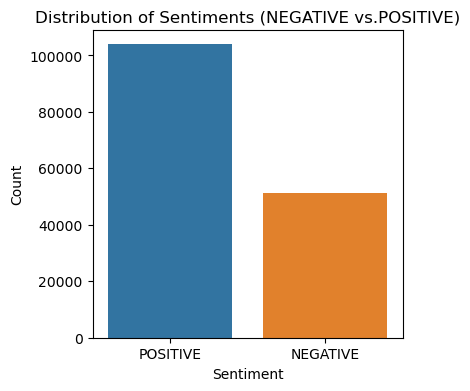

In [5]:
# Creating a bar plot for the distribution of sentiments
plt.figure(figsize=(4,4))
sns.countplot(x='sentiment', data=train_data)
plt.title('Distribution of Sentiments (NEGATIVE vs.POSITIVE)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

Distribution shows that the data is skewed towards the POSITIVE sentiment.

In [6]:
# Function to fill NA values
def fill_na_values(data):
    return data.fillna('')

# Function to clean the text
def preprocess_reviewtext(text):
        # Converting to lowercase
        text = text.lower()

        # Removing unwanted characters using regex
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\d+', '', text)      # Remove numbers

        #Removing stop words
        stop_words = ["i", "me", "my", "myself", "we", "us", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
        text = ' '.join([word for word in text.split() if word not in stop_words])

        return text

#preprocess_reviewtext("Hi! there2 how are you my amazing @#s s t bad")

In [7]:
# Wrap functions using FunctionTransformer
fillna_transformer = FunctionTransformer(lambda x: x.fillna(''), validate=False)
preprocess_transformer = FunctionTransformer(lambda x: x.apply(preprocess_reviewtext), validate=False)

In [8]:
# Seprating the variables
X= train_data['reviewText']
y= train_data['sentiment']

In [9]:
# Splitting the data into features (reviewText) and target (sentiment)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [10]:
#Pipeline for Logistic Regression
pipeline_lr = Pipeline([
    ('fillna', fillna_transformer),
    ('preprocess', preprocess_transformer),
    ('tfidf', TfidfVectorizer()),
    ('logistic_regression_model', LogisticRegression( penalty='l2', solver='saga'))
])
pipeline_lr.fit(X_train, y_train)

# Predict using the pipeline on training data
y_train_pred_lr = pipeline_lr.predict(X_train)

# Predict using the pipeline on validation data
y_val_pred_lr = pipeline_lr.predict(X_val)

# Compute accuracy for training data
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)

# Compute accuracy for validation data
val_accuracy_lr = accuracy_score(y_val, y_val_pred_lr)

print("Logistic Regression Training Accuracy:", train_accuracy_lr)
print("Logistic Regression Validation Accuracy:", val_accuracy_lr)

Logistic Regression Training Accuracy: 0.8490146294281223
Logistic Regression Validation Accuracy: 0.8025598865138472


In [11]:
#Creating Confusion Matrix and Classification Report for LR
print("Confuison Matrix for Logistic Regression:","\n",confusion_matrix(y_val, y_val_pred_lr))
print()
print("Classification Report for Logistic Regression:","\n",classification_report(y_val, y_val_pred_lr))

Confuison Matrix for Logistic Regression: 
 [[ 6010  4236]
 [ 1888 18883]]

Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

    NEGATIVE       0.76      0.59      0.66     10246
    POSITIVE       0.82      0.91      0.86     20771

    accuracy                           0.80     31017
   macro avg       0.79      0.75      0.76     31017
weighted avg       0.80      0.80      0.80     31017



# Decision Tree Model

In [12]:
#Pipeline for DecisionTree
pipeline_DT = Pipeline([
    ('fillna', fillna_transformer),
    ('preprocess', preprocess_transformer),
    ('tfidf', TfidfVectorizer()),
    ('decision_tree_model', DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=3))
])
pipeline_DT.fit(X_train, y_train)

# Predict using the pipeline on training data
y_train_pred_DT = pipeline_DT.predict(X_train)

# Predict using the pipeline on validation data
y_val_pred_DT = pipeline_DT.predict(X_val)

# Compute accuracy for training data
train_accuracy_DT = accuracy_score(y_train, y_train_pred_DT)

# Compute accuracy for validation data
val_accuracy_DT = accuracy_score(y_val, y_val_pred_DT)

print("Decision Tree Training Accuracy:", train_accuracy_DT)
print("Decision Tree Validation Accuracy:", val_accuracy_DT)

Decision Tree Training Accuracy: 0.6919195582960544
Decision Tree Validation Accuracy: 0.6909759164329239


In [13]:
#Creating Confusion Matrix and Classification Report for DT
print("Confuison Matrix for Decision Tree:","\n",confusion_matrix(y_val, y_val_pred_DT))
print()
print("Classification Report for Decision Tree:","\n",classification_report(y_val, y_val_pred_DT))

Confuison Matrix for Decision Tree: 
 [[  990  9256]
 [  329 20442]]

Classification Report for Decision Tree: 
               precision    recall  f1-score   support

    NEGATIVE       0.75      0.10      0.17     10246
    POSITIVE       0.69      0.98      0.81     20771

    accuracy                           0.69     31017
   macro avg       0.72      0.54      0.49     31017
weighted avg       0.71      0.69      0.60     31017



# Multinomial Naive Bayes Model
### For this using hyperparameters to best fit the model

In [14]:
# Create the enhanced end-to-end pipeline
pipeline_MNB = Pipeline([
    ('fillna', fillna_transformer),
    ('preprocess', preprocess_transformer),
    ('tfidf', TfidfVectorizer(max_features = 5000)), 
    ('multinomialNB_model', MultinomialNB())
])

# Hyperparameters to tune
params = {
    'multinomialNB_model__alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 10.0]
}

# Grid search with cross-validation
grid_search_mnb = GridSearchCV(pipeline_MNB, param_grid=params, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_mnb.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params_mnb = grid_search_mnb.best_params_
best_score_mnb = grid_search_mnb.best_score_
best_pipeline = grid_search_mnb.best_estimator_

best_params_mnb, best_score_mnb

({'multinomialNB_model__alpha': 0.001}, 0.7694595574900254)

In [15]:
# Predict using the pipeline on training data
y_train_pred_MNB = best_pipeline.predict(X_train)

# Predict using the pipeline on validation data
y_val_pred_MNB = best_pipeline.predict(X_val)

# Compute accuracy for training data
train_accuracy_MNB = accuracy_score(y_train, y_train_pred_MNB)

# Compute accuracy for validation data
val_accuracy_MNB = accuracy_score(y_val, y_val_pred_MNB)

print("MultinomialNB Training Accuracy:", train_accuracy_MNB)
print("MultinomialNB Validation Accuracy:", val_accuracy_MNB)

MultinomialNB Training Accuracy: 0.780002418087293
MultinomialNB Validation Accuracy: 0.7718025598865138


In [16]:
#Creating Confusion Matrix and Classification Report for MNB
print("Confuison Matrix for MultinomialNB:","\n",confusion_matrix(y_val, y_val_pred_MNB))
print()
print("Classification Report for MultinomialNB:","\n",classification_report(y_val, y_val_pred_MNB))

Confuison Matrix for MultinomialNB: 
 [[ 4265  5981]
 [ 1097 19674]]

Classification Report for MultinomialNB: 
               precision    recall  f1-score   support

    NEGATIVE       0.80      0.42      0.55     10246
    POSITIVE       0.77      0.95      0.85     20771

    accuracy                           0.77     31017
   macro avg       0.78      0.68      0.70     31017
weighted avg       0.78      0.77      0.75     31017



# Logisctic Regression has the highest score 
#### So let's fit it

In [17]:
#Loading test data
test_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

In [18]:
# Transforming the test data and making predictions
test_predictions= pipeline_lr.predict(test_data['reviewText'])

test_predictions.shape

(55315,)

In [19]:
# Creating a submission DataFrame with the predicted sentiments
submission = pd.DataFrame(columns=['id', 'sentiment'])

submission['id']= [i for i in range(len(test_predictions))]
submission['sentiment'] =test_predictions

In [20]:
submission.shape

(55315, 2)

In [21]:
submission.info

<bound method DataFrame.info of           id sentiment
0          0  POSITIVE
1          1  POSITIVE
2          2  POSITIVE
3          3  POSITIVE
4          4  POSITIVE
...      ...       ...
55310  55310  POSITIVE
55311  55311  NEGATIVE
55312  55312  NEGATIVE
55313  55313  POSITIVE
55314  55314  NEGATIVE

[55315 rows x 2 columns]>

In [22]:
#Creating the file
submission.to_csv('submission.csv', index=False)

In [23]:
confirm = pd.read_csv('submission.csv')
confirm.head()

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
